# Comparative Analysis of iPhone 12 vs. Galaxy S20 Release Sentiments in Twitter

- **Motivation** : Companies often try to collect feedbacks from customers in various ways, ranging from conducting surveys to sending out feedback emails. However, there is a low respons rate for these kind of traditional methods, and even the feedback might not be very honest. We can solve this issue by mining publicly available data such as Twitter tweets. We can get customer's honest feedback in timely manner. This way, companies can respond to customer's signals or shifts in a timely manner. 

- **Aim** : Discover the customers' views of iPhone 12 and Galaxy S20 from Twitter tweets. Find out keywords mentioned often by using frequency analysis. Compare the sentiment of frequently used words of iPhone 12 and Galaxy S20


# 1. Crawl Twitter Data

**Data Collection period for iPhone 12 and Galaxy S20 are as follows:**

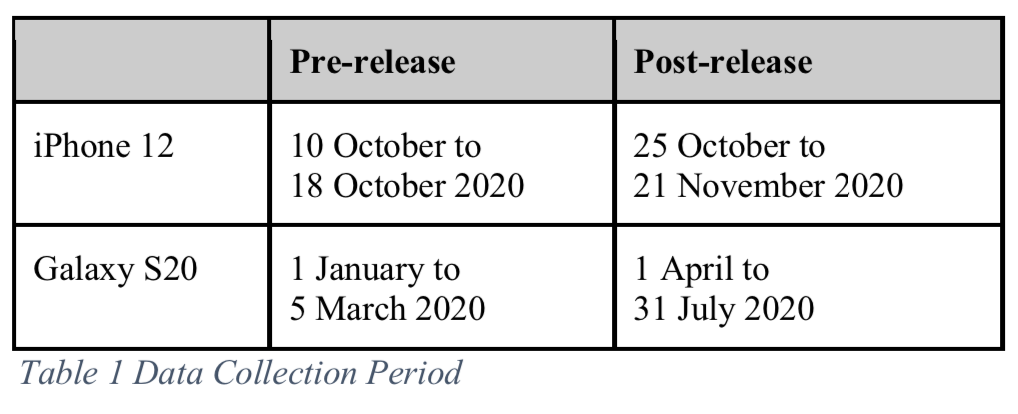

In [2]:
from IPython.display import Image
Image('Data_Table.png')

In [1]:
#Tweepy is a python library to access Twitter API.
import tweepy
import csv
import pandas as pd

In [2]:
#Provide your own credentials here.
consumer_key = '########'
consumer_secret = '#######'
access_token = '######'
access_token_secret = '######'

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [4]:
import snscrape.modules.twitter as sntwitter

**To collect iPhone 12 data, simply change the keyword under TwitterSearchScraper( )**

In [5]:
csvFile = open('twitter_galaxy_before1.csv', 'a') #creates a file in which you want to store the data.
csvWriter = csv.writer(csvFile)
maxTweets = 100000  # the number of tweets you require
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('Galaxy S20' + ' lang:en since:2020-01-01 until:2020-03-05 -filter:links -filter:replies').get_items()) : #to take out links and replies: -filter:links -filter:replies
        if i > maxTweets :
            break
        #print(tweet.date)
        csvWriter.writerow([tweet.id, tweet.date, tweet.content.encode('utf-8')]) #If you need more information, just provide the attributes
        
csvFile.close()

In [6]:
csvFile = open('twitter_galaxy_after.csv', 'a') #creates a file in which you want to store the data.
csvWriter = csv.writer(csvFile)
maxTweets = 100000  # the number of tweets you require
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('Galaxy S20' + ' lang:en since:2020-04-01 until:2020-08-01 -filter:links -filter:replies').get_items()) : #to take out links and replies: -filter:links -filter:replies
        if i > maxTweets :
            break
        #print(tweet.date)
        csvWriter.writerow([tweet.id, tweet.date, tweet.content.encode('utf-8')]) #If you need more information, just provide the attributes
        
csvFile.close()

# 2. Data Preprocessing

In [32]:
import pandas as pd
import nltk
import numpy as np
from bs4 import BeautifulSoup
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re
from nltk.stem import WordNetLemmatizer

In [33]:
df_tw1 = pd.read_csv('twitter1.csv')
df_tw2 = pd.read_csv('twitter2.csv')

In [34]:
df_tw1.shape

(20243, 3)

In [35]:
df_tw2.shape

(13455, 3)

**We can see that the content is messy. We need to get rid of some words that does not add meaning to the content.** 

In [36]:
df_tw1.head(3)

,Id,Date,Content
0,1319065896380473344,2020-10-21 23:59:51+00:00,b'I think @MeteosLoL should pick #JoeM for the...
1,1329646007278133250,2020-11-20 04:41:26+00:00,b'&lt;\xec\x9a\x94\xeb\xa6\xac\xec\x99\x95 \xe...
2,1319065878403534848,2020-10-21 23:59:47+00:00,b'I think @JoeManganiello should build #Tank f...


### remove @id

In [37]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt    

df_tw1['Content'] = np.vectorize(remove_pattern)(df_tw1['Content'], "@[\w]*")
df_tw1.head(3)

,Id,Date,Content
0,1319065896380473344,2020-10-21 23:59:51+00:00,b'I think should pick #JoeM for the top lane ...
1,1329646007278133250,2020-11-20 04:41:26+00:00,b'&lt;\xec\x9a\x94\xeb\xa6\xac\xec\x99\x95 \xe...
2,1319065878403534848,2020-10-21 23:59:47+00:00,b'I think should build #Tank for the League ...


In [38]:
df_tw2['Content'] = np.vectorize(remove_pattern)(df_tw2['Content'], "@[\w]*")
df_tw2.head(3)

,Id,Date,Content
0,1328125473176563713,2020-11-15 23:59:22+00:00,"b""iPhone 12 is pretty dope but case doesn't co..."
1,1329646007278133250,2020-11-20 04:41:26+00:00,b'&lt;\xec\x9a\x94\xeb\xa6\xac\xec\x99\x95 \xe...
2,1328125021659783168,2020-11-15 23:57:35+00:00,b'The iPhone 12 screen better be indestructible.'


### remove punctuation

In [39]:
def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct

In [40]:
df_tw1['Content'] = df_tw1['Content'].apply(lambda x: remove_punctuation(x))
df_tw1['Content'].head(3)

0    bI think  should pick JoeM for the top lane on...
1    bltxecx9ax94xebxa6xacxecx99x95 xebxb9x84xebxa3...
2    bI think  should build Tank for the  League of...
Name: Content, dtype: object

In [41]:
df_tw2['Content'] = df_tw2['Content'].apply(lambda x: remove_punctuation(x))
df_tw2['Content'].head(3)

0    biPhone 12 is pretty dope but case doesnt come...
1    bltxecx9ax94xebxa6xacxecx99x95 xebxb9x84xebxa3...
2       bThe iPhone 12 screen better be indestructible
Name: Content, dtype: object

### tokenize

In [42]:
#instantiate tokenizer
tokenizer = RegexpTokenizer(r'\w+')   #removes puncuation
#x.lower -> make everything to lower case 
df_tw1['Content'] = df_tw1['Content'].apply(lambda x: tokenizer.tokenize(x.lower()))
df_tw1['Content'].head(3)

0    [bi, think, should, pick, joem, for, the, top,...
1    [bltxecx9ax94xebxa6xacxecx99x95, xebxb9x84xebx...
2    [bi, think, should, build, tank, for, the, lea...
Name: Content, dtype: object

In [43]:
df_tw2['Content'] = df_tw2['Content'].apply(lambda x: tokenizer.tokenize(x.lower()))
df_tw2['Content'].head(3)

0    [biphone, 12, is, pretty, dope, but, case, doe...
1    [bltxecx9ax94xebxa6xacxecx99x95, xebxb9x84xebx...
2    [bthe, iphone, 12, screen, better, be, indestr...
Name: Content, dtype: object

### remove stop words 

In [44]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words 

In [45]:
df_tw1['Content'] = df_tw1['Content'].apply(lambda x: remove_stopwords(x))
df_tw1['Content'].head(3)

0    [bi, think, pick, joem, top, lane, red, side, ...
1    [bltxecx9ax94xebxa6xacxecx99x95, xebxb9x84xebx...
2    [bi, think, build, tank, league, legends, wild...
Name: Content, dtype: object

In [46]:
df_tw2['Content'] = df_tw2['Content'].apply(lambda x: remove_stopwords(x))
df_tw2['Content'].head(3)

0    [biphone, 12, pretty, dope, case, doesnt, come...
1    [bltxecx9ax94xebxa6xacxecx99x95, xebxb9x84xebx...
2    [bthe, iphone, 12, screen, better, indestructi...
Name: Content, dtype: object

### Lemmatization

In [48]:
#Instantiate lemmatizer
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = " ".join([lemmatizer.lemmatize(i) for i in text])
    return lem_text

In [49]:
df_tw1['Content'] = df_tw1['Content'].apply(lambda x: word_lemmatizer(x))
df_tw1['Content'].head(3)

0    bi think pick joem top lane red side league le...
1    bltxecx9ax94xebxa6xacxecx99x95 xebxb9x84xebxa3...
2    bi think build tank league legend wild rift in...
Name: Content, dtype: object

In [50]:
df_tw2['Content'] = df_tw2['Content'].apply(lambda x: word_lemmatizer(x))
df_tw2['Content'].head(3)

0    biphone 12 pretty dope case doesnt come tomorr...
1    bltxecx9ax94xebxa6xacxecx99x95 xebxb9x84xebxa3...
2          bthe iphone 12 screen better indestructible
Name: Content, dtype: object

### Stemming

In [24]:
# from nltk.stem.porter import PorterStemmer

In [25]:
# stemmer = PorterStemmer()
# def word_stemmer(text):
#     stem_text = " ".join([stemmer.stem(i) for i in text])
#     return stem_text

In [26]:
# df_tw1['Content'] = df_tw1['Content'].apply(lambda x: word_stemmer(x))
# df_tw1['Content'].head(3)

0    bi think pick joem top lane red side leagu leg...
1    bltxecx9ax94xebxa6xacxecx99x95 xebxb9x84xebxa3...
2    bi think build tank leagu legend wild rift inv...
Name: Content, dtype: object

In [27]:
# df_tw2['Content'] = df_tw2['Content'].apply(lambda x: word_stemmer(x))
# df_tw2['Content'].head(3)

0    biphon 12 pretti dope case doesnt come tomorro...
1    bltxecx9ax94xebxa6xacxecx99x95 xebxb9x84xebxa3...
2               bthe iphon 12 screen better indestruct
Name: Content, dtype: object

### remove "b"

In [51]:
df_tw1['Content']= df_tw1['Content'].str[1:]
df_tw1['Content'].head(3)

0    i think pick joem top lane red side league leg...
1    ltxecx9ax94xebxa6xacxecx99x95 xebxb9x84xebxa3x...
2    i think build tank league legend wild rift inv...
Name: Content, dtype: object

In [52]:
df_tw2['Content']= df_tw2['Content'].str[1:]
df_tw2['Content'].head(3)

0    iphone 12 pretty dope case doesnt come tomorro...
1    ltxecx9ax94xebxa6xacxecx99x95 xebxb9x84xebxa3x...
2           the iphone 12 screen better indestructible
Name: Content, dtype: object

In [53]:
df_tw1.to_csv('twitter1_cleaned.csv')
df_tw2.to_csv('twitter2_cleaned.csv')

# 3. Visualization

In [31]:
import pandas as pd
import nltk
import numpy as np
from bs4 import BeautifulSoup

In [32]:
df_tw1 = pd.read_csv('twitter1_final.csv')
df_tw2 = pd.read_csv('twitter2_final.csv')

In [33]:
df_tw1.shape

(146629, 4)

In [34]:
df_tw2.shape

(38867, 4)

In [3]:
df_tw1.head(2)

,Unnamed: 0,Id,Date,Content
0,0,1317978758641520640,2020-10-18 23:59:57+00:00,iphone 12 iphone x iphone 8
1,1,1320964861535211520,2020-10-27 05:45:39+00:00,xebxa7x8cxecx84xb1 xebxb9x84xecx97xbcxecx97x90...


In [35]:
df_tw1['date_only'] = pd.to_datetime(df_tw1['Date']).dt.date
df_tw2['date_only'] = pd.to_datetime(df_tw2['Date']).dt.date

In [36]:
df_tw1_cnt = df_tw1.groupby('date_only').count().reset_index()
df_tw2_cnt = df_tw2.groupby('date_only').count().reset_index()

In [39]:
# take out tweets outside of date range
df_tw1 = df_tw1[df_tw1['Date']<'2020-10-20']
df_tw2 = df_tw2
df_before_cnt = df_before.groupby('date_only').count().reset_index()
df_after_cnt = df_after.groupby('date_only').count().reset_index()

In [40]:
df_tw1.shape

(145190, 5)

In [41]:
df_tw1.head(3)

,Unnamed: 0,Id,Date,Content,date_only
0,0,1317978758641520640,2020-10-18 23:59:57+00:00,iphone 12 iphone x iphone 8,2020-10-18
2,2,1317978148760334336,2020-10-18 23:57:32+00:00,kinda want iphone 12 kinda donxe2x80x99t want ...,2020-10-18
3,3,1317977992933507073,2020-10-18 23:56:55+00:00,biiiitch preordered iphone 12 pro ahhh xf0x9fx...,2020-10-18


In [42]:
count1 = (df_tw1['Content'].str.split(expand=True)
              .stack()
              .value_counts()
              .rename_axis('vals')
              .reset_index(name='count'))
# count1.to_csv('/Users/kanghyojeong/Desktop/count.csv')

In [44]:
count1 = count1.drop(count1.index[[16,31,32]])

In [45]:
count2 = (df_tw2['Content'].str.split(expand=True)
              .stack()
              .value_counts()
              .rename_axis('vals')
              .reset_index(name='count'))
# count2.to_csv('/Users/kanghyojeong/Desktop/count2.csv')

In [47]:
count2 = count2.drop(count2.index[[10,16,23,46]])

In [48]:
rank1 = dict(zip(count1['vals'].tolist(), count1['count'].tolist()))

In [50]:
rank1_df = pd.DataFrame(rank1.items(), columns=['Word', 'Count'])
rank1_df.head(40)

,Word,Count
0,iphone,154456
1,12,130501
2,pro,35877
3,iphone12,21433
4,apple,17937
5,new,17201
6,max,14257
7,appleevent,14241
8,like,12946
9,get,12126


# WordCloud

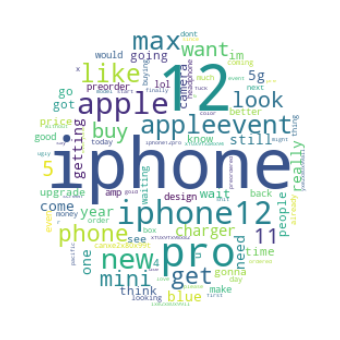

In [51]:
from wordcloud import WordCloud
from PIL import Image
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)
wc = WordCloud(width=800,background_color="white", height=400, 
               max_words=100, mask=mask).generate_from_frequencies(rank1)

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [52]:
rank2 = dict(zip(count2['vals'].tolist(), count2['count'].tolist()))
wc2 = WordCloud(width=800, height=400, max_words=100).generate_from_frequencies(rank2)

In [53]:
rank2_df = pd.DataFrame(rank2.items(), columns=['Word', 'Count'])
rank2_df.head(40)

,Word,Count
0,iphone,40532
1,12,37363
2,pro,15522
3,max,10623
4,new,4789
5,get,4309
6,phone,4091
7,got,3271
8,mini,3234
9,like,2955


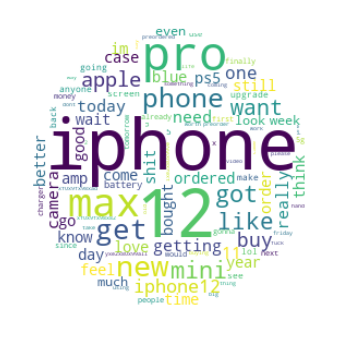

In [54]:
wc2 = WordCloud(width=800,background_color="white", height=400, 
               max_words=100, mask=mask).generate_from_frequencies(rank2)

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.show()

# Frequency chart

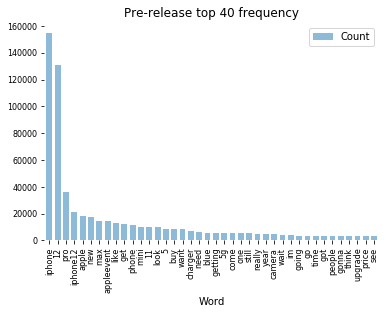

In [76]:
rank1_df.loc[:39,:].plot(kind ='bar',x='Word', y='Count',title="Pre-release top 40 frequency", 
                         width=0.7, fontsize =8, alpha =0.5)
plt.xticks(rotation=90)
plt.box(False)

plt.show()


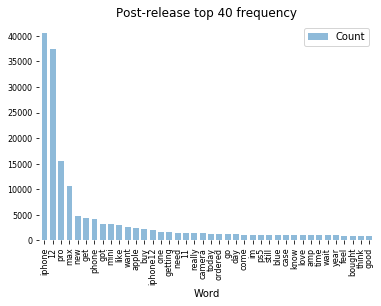

In [83]:
rank2_df.loc[:39,:].plot(kind ='bar',x='Word', y='Count',title="Post-release top 40 frequency", 
                         width=0.7, fontsize =8, alpha =0.5)
plt.xticks(rotation=90)
plt.box(False)
plt.show()

# 4. Sentiment Analysis

In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [11]:
# def sentiment_analyzer_scores(sentence):
#     score = analyser.polarity_scores(sentence)
#     print("{:-<40} {}".format(sentence, str(score)))

In [27]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(df_tw1['Content'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['text'][i]))
    compound = analyzer.polarity_scores(df_tw1['Content'][i])["compound"]
    pos = analyzer.polarity_scores(df_tw1['Content'][i])["pos"]
    neu = analyzer.polarity_scores(df_tw1['Content'][i])["neu"]
    neg = analyzer.polarity_scores(df_tw1['Content'][i])["neg"]
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [22]:
sentiments_score = pd.DataFrame.from_dict(scores)
df_tw1_sentiment = df_tw1.join(sentiments_score)
df_tw1_sentiment.head()

,Unnamed: 0,Id,Date,Content,Compound,Positive,Negative,Neutral
0,0,1317978758641520640,2020-10-18 23:59:57+00:00,iphone 12 iphone x iphone 8,0.0000,0.000,0.00,1.000
1,1,1320964861535211520,2020-10-27 05:45:39+00:00,xebxa7x8cxecx84xb1 xebxb9x84xecx97xbcxecx97x90...,0.0000,0.000,0.00,1.000
2,2,1317978148760334336,2020-10-18 23:57:32+00:00,kinda want iphone 12 kinda donxe2x80x99t want ...,-0.5059,0.142,0.23,0.628
3,3,1317977992933507073,2020-10-18 23:56:55+00:00,biiiitch preordered iphone 12 pro ahhh xf0x9fx...,0.0000,0.000,0.00,1.000
4,4,1317977750679019524,2020-10-18 23:55:57+00:00,looking forward week working three day week mo...,0.0000,0.000,0.00,1.000


In [29]:
df_tw1_sentiment.to_csv('tw1_sentiment.csv')

In [25]:
scores_2 = []
# Declare variables for scores
compound_list_2 = []
positive_list_2 = []
negative_list_2 = []
neutral_list_2 = []
for i in range(df_tw2['Content'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['text'][i]))
    compound_2 = analyzer.polarity_scores(df_tw2['Content'][i])["compound"]
    pos_2 = analyzer.polarity_scores(df_tw2['Content'][i])["pos"]
    neu_2 = analyzer.polarity_scores(df_tw2['Content'][i])["neu"]
    neg_2 = analyzer.polarity_scores(df_tw2['Content'][i])["neg"]
    
    scores_2.append({"Compound": compound_2,
                       "Positive": pos_2,
                       "Negative": neg_2,
                       "Neutral": neu_2
                  })

In [26]:
sentiments_score_2 = pd.DataFrame.from_dict(scores_2)
df_tw2_sentiment = df_tw2.join(sentiments_score_2)
df_tw2_sentiment.head()

,Unnamed: 0,Id,Date,Content,Compound,Positive,Negative,Neutral
0,0,1330187273783095297,2020-11-21 16:32:14+00:00,fuck iphone 12 want 11 pro max xf0x9fx98xad,-0.4939,0.120,0.324,0.556
1,1,1320964861535211520,2020-10-27 05:45:39+00:00,xebxa7x8cxecx84xb1 xebxb9x84xecx97xbcxecx97x90...,0.0000,0.000,0.000,1.000
2,2,1330187213603295237,2020-11-21 16:32:00+00:00,realized dream iphone 12 dhmu im broke,-0.2023,0.204,0.286,0.510
3,3,1330186976507666433,2020-11-21 16:31:03+00:00,iphone 12 giveaway n n,0.0000,0.000,0.000,1.000
4,4,1330186970363027458,2020-11-21 16:31:02+00:00,iphone 12 pro max 512 gb edition cost 1399 app...,-0.3612,0.065,0.109,0.826


In [28]:
df_tw2_sentiment.head(10)

,Unnamed: 0,Id,Date,Content,Compound,Positive,Negative,Neutral
0,0,1330187273783095297,2020-11-21 16:32:14+00:00,fuck iphone 12 want 11 pro max xf0x9fx98xad,-0.4939,0.120,0.324,0.556
1,1,1320964861535211520,2020-10-27 05:45:39+00:00,xebxa7x8cxecx84xb1 xebxb9x84xecx97xbcxecx97x90...,0.0000,0.000,0.000,1.000
2,2,1330187213603295237,2020-11-21 16:32:00+00:00,realized dream iphone 12 dhmu im broke,-0.2023,0.204,0.286,0.510
3,3,1330186976507666433,2020-11-21 16:31:03+00:00,iphone 12 giveaway n n,0.0000,0.000,0.000,1.000
4,4,1330186970363027458,2020-11-21 16:31:02+00:00,iphone 12 pro max 512 gb edition cost 1399 app...,-0.3612,0.065,0.109,0.826
5,5,1330186769401335817,2020-11-21 16:30:14+00:00,new iphone 12 pro max blazing fast make old on...,0.0000,0.000,0.000,1.000
6,6,1330186421689257995,2020-11-21 16:28:51+00:00,ok want iphone 12,0.3612,0.636,0.000,0.364
7,7,1330186125634375684,2020-11-21 16:27:40+00:00,appropriate say asuu strike u amadioha strike ...,-0.3612,0.000,0.184,0.816
8,8,1330186100674093059,2020-11-21 16:27:34+00:00,first time tertarik dengan latest iphone iphon...,0.0000,0.000,0.000,1.000
9,9,1330185968075333635,2020-11-21 16:27:03+00:00,cannot wait get iphone 12 workkkk,0.0000,0.000,0.000,1.000


In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from matplotlib import pyplot
import numpy as np
import seaborn as sns

In [3]:
df_tw1 = pd.read_csv('twitter1_final.csv')
df_tw2 = pd.read_csv('twitter2_final.csv')

In [4]:
df_tw1.head()

,Unnamed: 0,Id,Date,Content
0,0,1317978758641520640,2020-10-18 23:59:57+00:00,iphone 12 iphone x iphone 8
1,1,1320964861535211520,2020-10-27 05:45:39+00:00,xebxa7x8cxecx84xb1 xebxb9x84xecx97xbcxecx97x90...
2,2,1317978148760334336,2020-10-18 23:57:32+00:00,kinda want iphone 12 kinda donxe2x80x99t want ...
3,3,1317977992933507073,2020-10-18 23:56:55+00:00,biiiitch preordered iphone 12 pro ahhh xf0x9fx...
4,4,1317977750679019524,2020-10-18 23:55:57+00:00,looking forward week working three day week mo...


In [5]:
df_tw2.head()

,Unnamed: 0,Id,Date,Content
0,0,1330187273783095297,2020-11-21 16:32:14+00:00,fuck iphone 12 want 11 pro max xf0x9fx98xad
1,1,1320964861535211520,2020-10-27 05:45:39+00:00,xebxa7x8cxecx84xb1 xebxb9x84xecx97xbcxecx97x90...
2,2,1330187213603295237,2020-11-21 16:32:00+00:00,realized dream iphone 12 dhmu im broke
3,3,1330186976507666433,2020-11-21 16:31:03+00:00,iphone 12 giveaway n n
4,4,1330186970363027458,2020-11-21 16:31:02+00:00,iphone 12 pro max 512 gb edition cost 1399 app...


In [6]:
df_tw1['date_only'] = pd.to_datetime(df_tw1['Date']).dt.date
df_tw2['date_only'] = pd.to_datetime(df_tw2['Date']).dt.date

In [7]:
df_tw1_cnt = df_tw1.groupby('date_only').count().reset_index()
df_tw2_cnt = df_tw2.groupby('date_only').count().reset_index()

In [8]:
df_tw1_cnt

,date_only,Unnamed: 0,Id,Date,Content
0,2020-10-10,377,377,377,377
1,2020-10-11,380,380,380,380
2,2020-10-12,751,751,751,751
3,2020-10-13,66424,66424,66424,66424
4,2020-10-14,34232,34232,34232,34232
5,2020-10-15,12924,12924,12924,12924
6,2020-10-16,17009,17009,17009,17009
7,2020-10-17,7903,7903,7903,7903
8,2020-10-18,5190,5190,5190,5190
9,2020-10-27,698,698,698,698


In [9]:
df_tw2_cnt

,date_only,Unnamed: 0,Id,Date,Content
0,2020-10-27,127,127,127,127
1,2020-10-28,126,126,126,126
2,2020-11-01,1125,1125,1125,1125
3,2020-11-02,1443,1443,1443,1443
4,2020-11-03,1472,1472,1472,1472
5,2020-11-04,1208,1208,1208,1208
6,2020-11-05,1377,1377,1377,1377
7,2020-11-06,3337,3337,3337,3337
8,2020-11-07,1432,1432,1432,1432
9,2020-11-08,1090,1090,1090,1090


In [10]:
# take out tweets outside of date range
df_before = df_tw1[df_tw1['Date']<'2020-10-20']
df_after = df_tw2

In [11]:
df_before_cnt = df_before.groupby('date_only').count().reset_index()
df_after_cnt = df_after.groupby('date_only').count().reset_index()

In [12]:
df_before_cnt

,date_only,Unnamed: 0,Id,Date,Content
0,2020-10-10,377,377,377,377
1,2020-10-11,380,380,380,380
2,2020-10-12,751,751,751,751
3,2020-10-13,66424,66424,66424,66424
4,2020-10-14,34232,34232,34232,34232
5,2020-10-15,12924,12924,12924,12924
6,2020-10-16,17009,17009,17009,17009
7,2020-10-17,7903,7903,7903,7903
8,2020-10-18,5190,5190,5190,5190


In [13]:
df_after_cnt

,date_only,Unnamed: 0,Id,Date,Content
0,2020-10-27,127,127,127,127
1,2020-10-28,126,126,126,126
2,2020-11-01,1125,1125,1125,1125
3,2020-11-02,1443,1443,1443,1443
4,2020-11-03,1472,1472,1472,1472
5,2020-11-04,1208,1208,1208,1208
6,2020-11-05,1377,1377,1377,1377
7,2020-11-06,3337,3337,3337,3337
8,2020-11-07,1432,1432,1432,1432
9,2020-11-08,1090,1090,1090,1090


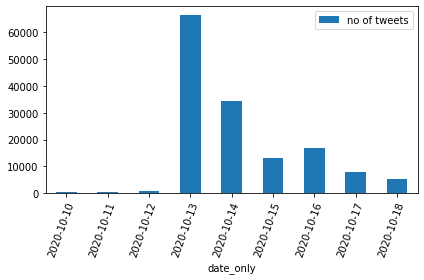

In [14]:
n_unique_dates = len(df_before_cnt.index.unique())

ax = df_before_cnt.plot.bar(x="date_only", y="Content")
ax.set_xticklabels(labels=df_before_cnt.date_only, rotation=70, rotation_mode="anchor", ha="right");
ax.legend(labels=['no of tweets']);
import matplotlib.pyplot as plt
plt.tight_layout()

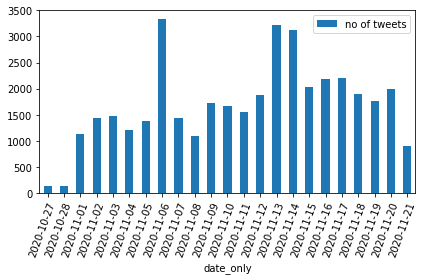

In [15]:
n_unique_dates = len(df_after_cnt.index.unique())

ax = df_after_cnt.plot.bar(x="date_only", y="Content")
ax.set_xticklabels(labels=df_after_cnt.date_only, rotation=70, rotation_mode="anchor", ha="right");
ax.legend(labels=['no of tweets']);

plt.tight_layout()

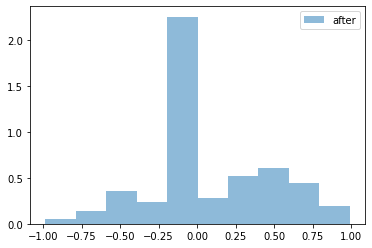

In [41]:
pyplot.hist(df_after['compound'], alpha=0.5, label='after', density=True)
pyplot.legend(loc='upper right')

In [17]:
analyzer = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(sentence)
    return score

In [18]:
df_before['compound'] = [sentiment_analyzer_scores(x)['compound'] for x in df_before['Content']]
df_before['neg'] = [sentiment_analyzer_scores(x)['neg'] for x in df_before['Content']]
df_before['neu'] = [sentiment_analyzer_scores(x)['neu'] for x in df_before['Content']]
df_before['pos'] = [sentiment_analyzer_scores(x)['pos'] for x in df_before['Content']]

/Users/kanghyojeong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/kanghyojeong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kanghyojeong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [19]:
df_before

,Unnamed: 0,Id,Date,Content,date_only,compound,neg,neu,pos
0,0,1317978758641520640,2020-10-18 23:59:57+00:00,iphone 12 iphone x iphone 8,2020-10-18,0.0000,0.000,1.000,0.000
2,2,1317978148760334336,2020-10-18 23:57:32+00:00,kinda want iphone 12 kinda donxe2x80x99t want ...,2020-10-18,-0.5059,0.230,0.628,0.142
3,3,1317977992933507073,2020-10-18 23:56:55+00:00,biiiitch preordered iphone 12 pro ahhh xf0x9fx...,2020-10-18,0.0000,0.000,1.000,0.000
4,4,1317977750679019524,2020-10-18 23:55:57+00:00,looking forward week working three day week mo...,2020-10-18,0.0000,0.000,1.000,0.000
5,5,1317977511951814656,2020-10-18 23:55:00+00:00,want iphone12 pro neow,2020-10-18,0.0772,0.000,0.698,0.302
...,...,...,...,...,...,...,...,...,...
146624,146624,1314722983869665281,2020-10-10 00:22:40+00:00,okay like preorder iphone 12,2020-10-10,0.5267,0.000,0.405,0.595
146625,146625,1314722883948679169,2020-10-10 00:22:16+00:00,many preview iphone 12 waiting review coz that...,2020-10-10,0.2263,0.000,0.872,0.128
146626,146626,1314721329262858242,2020-10-10 00:16:05+00:00,donxe2x80x99t like phone going slowxf0x9fx98x9...,2020-10-10,0.3612,0.000,0.783,0.217
146627,146627,1314720558718676993,2020-10-10 00:13:02+00:00,iphone 7 plus battery died goodxf0x9fx98x82 cx...,2020-10-10,-0.5574,0.231,0.769,0.000


In [20]:
df_after['compound'] = [sentiment_analyzer_scores(x)['compound'] for x in df_after['Content']]
df_after['neg'] = [sentiment_analyzer_scores(x)['neg'] for x in df_after['Content']]
df_after['neu'] = [sentiment_analyzer_scores(x)['neu'] for x in df_after['Content']]
df_after['pos'] = [sentiment_analyzer_scores(x)['pos'] for x in df_after['Content']]

In [21]:
df_before.sort_values(by=['compound'])

,Unnamed: 0,Id,Date,Content,date_only,compound,neg,neu,pos
1596,1596,1317640577853255680,2020-10-18 01:36:08+00:00,iphone x fell kitchen counternnno case onto ha...,2020-10-18,-0.9501,0.422,0.578,0.000
68718,68718,1317640577853255680,2020-10-18 01:36:08+00:00,iphone x fell kitchen counternnno case onto ha...,2020-10-18,-0.9501,0.422,0.578,0.000
16038,16038,1317640577853255680,2020-10-18 01:36:08+00:00,iphone x fell kitchen counternnno case onto ha...,2020-10-18,-0.9501,0.422,0.578,0.000
134097,134097,1316069349195685888,2020-10-13 17:32:38+00:00,bitch swear hate capitalism pissed iphone 12 u...,2020-10-13,-0.9451,0.802,0.198,0.000
73145,73145,1317154469960994816,2020-10-16 17:24:31+00:00,dear itxe2x80x99s fucking stupid make color lo...,2020-10-16,-0.9450,0.516,0.417,0.068
...,...,...,...,...,...,...,...,...,...
119136,119136,1316078598445387776,2020-10-13 18:09:24+00:00,apple event smiling entire time really reinfor...,2020-10-13,0.9719,0.000,0.489,0.511
105310,105310,1316114438265724928,2020-10-13 20:31:48+00:00,therexe2x80x99s point making video itxe2x80x99...,2020-10-13,0.9799,0.000,0.472,0.528
52631,52631,1316114438265724928,2020-10-13 20:31:48+00:00,therexe2x80x99s point making video itxe2x80x99...,2020-10-13,0.9799,0.000,0.472,0.528
95039,95039,1316212174231007234,2020-10-14 03:00:11+00:00,appleevent iphone12nhii dear everyone good mor...,2020-10-14,0.9871,0.000,0.321,0.679


In [22]:
df_after.sort_values(by=['compound'])

,Unnamed: 0,Id,Date,Content,date_only,compound,neg,neu,pos
18352,18352,1327230404286353409,2020-11-13 12:42:41+00:00,fuck missed iphone 12 pro max amp iphone 12 mi...,2020-11-13,-0.9844,0.549,0.451,0.000
16110,16110,1327401336674070528,2020-11-14 00:01:55+00:00,iphone 12 distractionnps5 distraction nmochas ...,2020-11-14,-0.9661,0.484,0.516,0.000
19316,19316,1327043630041882625,2020-11-13 00:20:31+00:00,hi yubikey 5c nfc intentionally much weaker 5 ...,2020-11-13,-0.9509,0.460,0.494,0.047
16803,16803,1327360353580183552,2020-11-13 21:19:04+00:00,wow fucking fraud didnxe2x80x99t include damn ...,2020-11-13,-0.9496,0.616,0.270,0.114
14929,14929,1327489698529484800,2020-11-14 05:53:02+00:00,pissed w bf bought bitch ps5 yesterday bitch g...,2020-11-14,-0.9442,0.486,0.473,0.041
...,...,...,...,...,...,...,...,...,...
14783,14783,1327508163097096192,2020-11-14 07:06:24+00:00,happy diwali xe2x9dxa4xefxb8x8fnmay crush say ...,2020-11-14,0.9812,0.069,0.362,0.570
15018,15018,1327481577769627648,2020-11-14 05:20:46+00:00,happy diwali xe2x9dxa4xefxb8x8fnmay crush say ...,2020-11-14,0.9812,0.069,0.362,0.570
7867,7867,1328647016671375361,2020-11-17 10:31:48+00:00,copped iphone 12 pro max itxe2x80x99s actually...,2020-11-17,0.9849,0.000,0.340,0.660
15423,15423,1327446562423783425,2020-11-14 03:01:37+00:00,diwali2020n happy diwali allnn may n crush say...,2020-11-14,0.9862,0.060,0.377,0.564


In [23]:
df_before_summary = df_before.groupby('date_only')['compound'].mean().reset_index()
df_after_summary = df_after.groupby('date_only')['compound'].mean().reset_index()

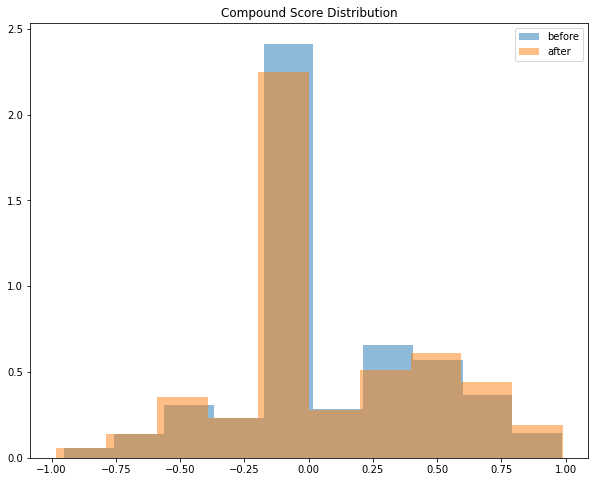

In [24]:
# plot by VADER compound score
from matplotlib import pyplot
import numpy as np

pyplot.figure(figsize=(10,8))
pyplot.hist(df_before['compound'], bins=10, alpha=0.5, label='before', density=True)
pyplot.hist(df_after['compound'], bins=10, alpha=0.5, label='after', density=True)
pyplot.legend(loc='upper right')
pyplot.title('Compound Score Distribution')
pyplot.show()

In [25]:
# classify the category
df_before['class'] = np.nan
df_before.loc[df_before['compound'] < -0.05, 'class'] = 'Negative'
df_before.loc[df_before['compound'] > 0.05, 'class'] = 'Positive'
df_before.loc[df_before['class'].isnull() == True, 'class'] = 'Neutral'

df_after['class'] = np.nan
df_after.loc[df_after['compound'] < -0.05, 'class'] = 'Negative'
df_after.loc[df_after['compound'] > 0.05, 'class'] = 'Positive'
df_after.loc[df_after['class'].isnull() == True, 'class'] = 'Neutral'

/Users/kanghyojeong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kanghyojeong/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


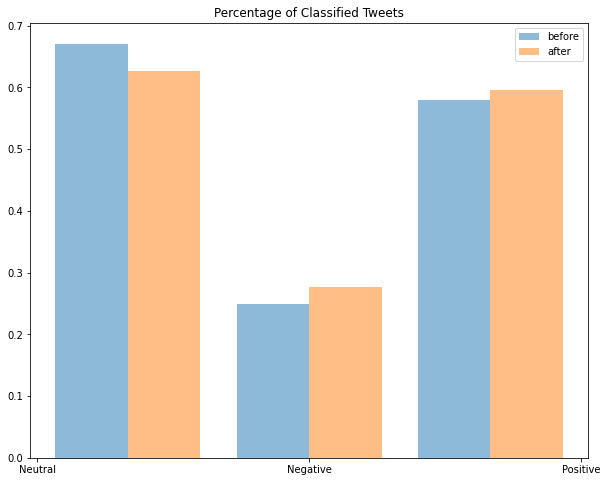

In [26]:
pyplot.figure(figsize=(10,8))
plt.hist([df_before['class'], df_after['class']], bins=3, label=['before', 'after'], density=True, alpha=0.5)
plt.legend(loc='upper right')
pyplot.title('Percentage of Classified Tweets')
plt.show()

In [27]:
df_before_pos = df_before[df_before['class']=='Positive']
df_before_neg = df_before[df_before['class']=='Negative']
df_before_neu = df_before[df_before['class']=='Neutral']
df_after_pos = df_after[df_after['class']=='Positive']
df_after_neg = df_after[df_after['class']=='Negative']
df_after_neu = df_after[df_after['class']=='Neutral']

In [28]:
count_before_pos = (df_before_pos['Content'].str.split(expand=True)
              .stack()
              .value_counts()
              .rename_axis('vals')
              .reset_index(name='count'))
rank_before_pos = dict(zip(count_before_pos['vals'].tolist(), count_before_pos['count'].tolist()))
rank_before_pos_df = pd.DataFrame(rank_before_pos.items(), columns=['Word', 'Count'])
rank_before_pos_df = rank_before_pos_df.drop(rank_before_pos_df.index[[16,31,32]])
rank_before_pos_df.head(40)

,Word,Count
0,iphone,62200
1,12,49798
2,pro,13836
3,like,11194
4,iphone12,9213
5,new,8376
6,apple,8289
7,look,7030
8,want,6437
9,appleevent,6023


In [29]:
count_before_neu = (df_before_neu['Content'].str.split(expand=True)
              .stack()
              .value_counts()
              .rename_axis('vals')
              .reset_index(name='count'))
rank_before_neu = dict(zip(count_before_neu['vals'].tolist(), count_before_neu['count'].tolist()))
rank_before_neu_df = pd.DataFrame(rank_before_neu.items(), columns=['Word', 'Count'])
rank_before_neu_df = rank_before_neu_df.drop(rank_before_neu_df.index[[18,35]])
rank_before_neu_df.head(39)

,Word,Count
0,iphone,66768
1,12,59127
2,pro,17477
3,iphone12,8914
4,max,6844
5,appleevent,6557
6,new,5682
7,apple,5668
8,get,4739
9,mini,4276


In [30]:
count_before_neg = (df_before_neg['Content'].str.split(expand=True)
              .stack()
              .value_counts()
              .rename_axis('vals')
              .reset_index(name='count'))
rank_before_neg = dict(zip(count_before_neg['vals'].tolist(), count_before_neg['count'].tolist()))
rank_before_neg_df = pd.DataFrame(rank_before_neg.items(), columns=['Word', 'Count'])
rank_before_neg_df = rank_before_neg_df.drop(rank_before_neg_df.index[[8,36,37]])
rank_before_neg_df.head(39)

,Word,Count
0,iphone,25488
1,12,21576
2,pro,4564
3,apple,3980
4,iphone12,3306
5,new,3143
6,phone,2752
7,get,2409
9,11,1943
10,max,1940


In [31]:
count_after_neu = (df_after_neu['Content'].str.split(expand=True)
              .stack()
              .value_counts()
              .rename_axis('vals')
              .reset_index(name='count'))
rank_after_neu = dict(zip(count_after_neu['vals'].tolist(), count_after_neu['count'].tolist()))
rank_after_neu_df = pd.DataFrame(rank_after_neu.items(), columns=['Word', 'Count'])
rank_after_neu_df = rank_after_neu_df.drop(rank_after_neu_df.index[[11,25,30,32]])
rank_after_neu_df.head(39)

,Word,Count
0,iphone,16227
1,12,15328
2,pro,6584
3,max,4627
4,get,1651
5,new,1515
6,got,1233
7,mini,1107
8,phone,941
9,iphone12,797


In [32]:
count_after_neg = (df_after_neg['Content'].str.split(expand=True)
              .stack()
              .value_counts()
              .rename_axis('vals')
              .reset_index(name='count'))
rank_after_neg = dict(zip(count_after_neg['vals'].tolist(), count_after_neg['count'].tolist()))
rank_after_neg_df = pd.DataFrame(rank_after_neg.items(), columns=['Word', 'Count'])
rank_after_neg_df = rank_after_neg_df.drop(rank_after_neg_df.index[[8,16,27]])
rank_after_neg_df.head(39)

,Word,Count
0,iphone,7610
1,12,7030
2,pro,2446
3,max,1596
4,phone,1089
5,new,999
6,get,922
7,shit,780
9,apple,660
10,got,648


In [33]:
count_after_pos = (df_after_pos['Content'].str.split(expand=True)
              .stack()
              .value_counts()
              .rename_axis('vals')
              .reset_index(name='count'))
rank_after_pos = dict(zip(count_after_pos['vals'].tolist(), count_after_pos['count'].tolist()))
rank_after_pos_df = pd.DataFrame(rank_after_pos.items(), columns=['Word', 'Count'])
rank_after_pos_df = rank_after_pos_df.drop(rank_after_pos_df.index[[11,14,25]])
rank_after_pos_df.head(39)

,Word,Count
0,iphone,16695
1,12,15005
2,pro,6492
3,max,4400
4,like,2473
5,new,2275
6,phone,2061
7,want,2009
8,get,1736
9,mini,1647


In [36]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

def Ovalwc(rank):
    wc = WordCloud(width=800,background_color="white", height=400, 
               max_words=100, mask=mask).generate_from_frequencies(rank)
    plt.figure(figsize=(6, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()
def Freqchart(rank_df):
    rank_df.loc[:39,:].plot(kind ='bar',x='Word', y='Count', 
                         width=0.7, fontsize =8, alpha =0.5)
    plt.xticks(rotation=90)
    plt.box(False)
    plt.show()

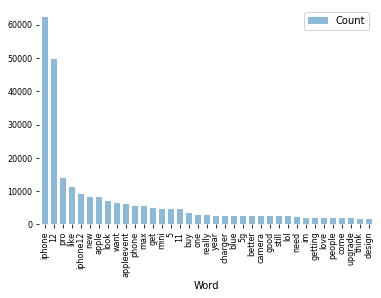

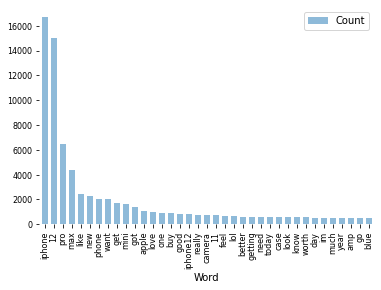

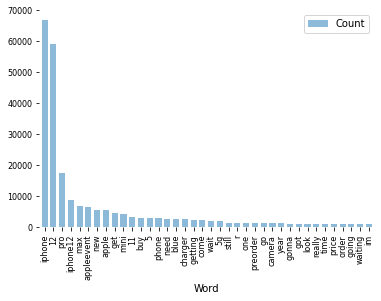

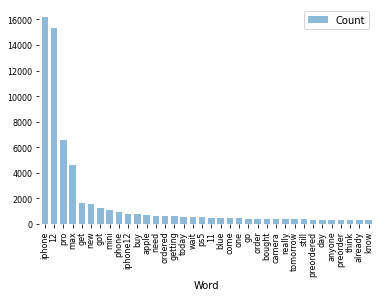

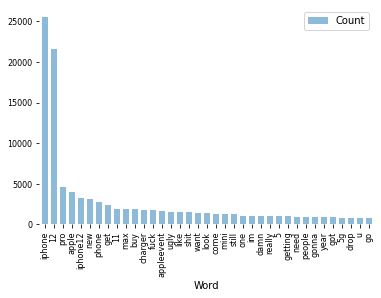

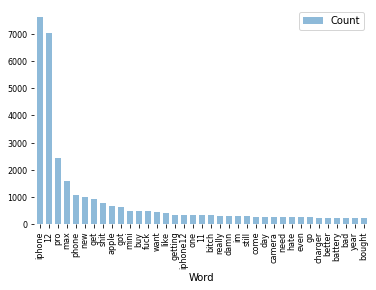

In [37]:
Freqchart(rank_before_pos_df)
Freqchart(rank_after_pos_df)
Freqchart(rank_before_neu_df)
Freqchart(rank_after_neu_df)
Freqchart(rank_before_neg_df)
Freqchart(rank_after_neg_df)

In [38]:
rank_before_pos_df = rank_before_pos_df.reset_index(drop=True)
rank_before_neu_df = rank_before_neu_df.reset_index(drop=True)
rank_before_neg_df = rank_before_neg_df.reset_index(drop=True)
rank_after_pos_df = rank_after_pos_df.reset_index(drop=True)
rank_after_neu_df = rank_after_neu_df.reset_index(drop=True)
rank_after_neg_df = rank_after_neg_df.reset_index(drop=True)


In [39]:
rank_combined = pd.concat([rank_before_pos_df, rank_after_pos_df, 
                           rank_before_neu_df, rank_after_neu_df,
                           rank_before_neg_df, rank_after_neg_df], axis=1, join='outer')
rank_combined.head(5)

,Word,Count,Word,Count,Word,Count,Word,Count,Word,Count,Word,Count
0,iphone,62200,iphone,16695.0,iphone,66768.0,iphone,16227.0,iphone,25488.0,iphone,7610.0
1,12,49798,12,15005.0,12,59127.0,12,15328.0,12,21576.0,12,7030.0
2,pro,13836,pro,6492.0,pro,17477.0,pro,6584.0,pro,4564.0,pro,2446.0
3,like,11194,max,4400.0,iphone12,8914.0,max,4627.0,apple,3980.0,max,1596.0
4,iphone12,9213,like,2473.0,max,6844.0,get,1651.0,iphone12,3306.0,phone,1089.0


In [40]:
rank_combined.columns = ["before_positive", "Count", "after_positive","Count","before_neutral","Count",
             "after_neutral","Count","before_negative","Count","after_negative","Count"]
rank_combined.head(5)



,before_positive,Count,after_positive,Count,before_neutral,Count,after_neutral,Count,before_negative,Count,after_negative,Count
0,iphone,62200,iphone,16695.0,iphone,66768.0,iphone,16227.0,iphone,25488.0,iphone,7610.0
1,12,49798,12,15005.0,12,59127.0,12,15328.0,12,21576.0,12,7030.0
2,pro,13836,pro,6492.0,pro,17477.0,pro,6584.0,pro,4564.0,pro,2446.0
3,like,11194,max,4400.0,iphone12,8914.0,max,4627.0,apple,3980.0,max,1596.0
4,iphone12,9213,like,2473.0,max,6844.0,get,1651.0,iphone12,3306.0,phone,1089.0
